<a href="https://colab.research.google.com/github/Zircornn-Black/Group3/blob/main/Phase_2_Project_PK_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OVERVIEW
# BACKGROUND INFORMATION
**Location**: King County is situated in the western part of Washington, USA and is known for being the most populous county in the state.
**Population**: The county has about 2.3 million residents, with two-thirds residing in the suburbs.

**Housing Data Analysis**
Dataset: The analysis is based on administrative data covering over 21,000 house sales that took place from May 2014 to May 2015 in King County.
Data Features: The dataset includes information on various aspects of homes such as prices, number of bedrooms, year of construction, and home conditions.
Housing Market: King County offers a diverse range of housing options including single-family homes, townhouses, condominiums, and apartments.

**Housing Varieties**
Single-family Homes: Ranging from historic to modern, these homes cater to different architectural and energy-efficient preferences.
Townhouses and Condominiums: These options are popular in urban areas like Seattle, providing a mix of affordability and convenience.

**Clientele**
Diverse Buyers: The county caters to a diverse range of buyers including first-time homebuyers, families, young professionals, and retirees.
Tech Influence: The presence of tech giants like Microsoft and Amazon in the county attracts a significant number of tech professionals, impacting the demand for upscale, modern homes.

#Analysis Objectives
The analysis on house sales in King County aims to achieve the following objectives:

*   Identify key features strongly correlated with price
*   Investigate the relationship between house size and price
*   Analyze how price correlates with the condition and grade of the houses
*   Explore the relationship between price and home features such as bedrooms and bathrooms + view
*   Identify the association between price and location



#Why?
These objectives aim to leverage data analysis and multiple regression modeling to provide valuable insights and recommendations for homeowners and real estate agencies, aiding in informed investment decisions.

#Business Understanding
**Housing Affordability:**
The cost of housing in King County, particularly in areas like Seattle, has risen significantly, posing challenges for low and middle-income families.
Access to affordable housing options has become a pressing concern due to the increased cost of living.

**Shortage of Housing Units:**
The shortage of housing units has led to intense competition among buyers, as the housing supply struggles to keep up with the growing demand, resulting in rising property prices.

**Traffic Congestion:**
Urban areas in King County experience heavy traffic congestion, impacting commutes and accessibility.

**Climate Change Challenges:**
Climate change, including rising sea levels and extreme weather events, poses challenges for waterfront properties and requires careful consideration in real estate planning and development.

Solutions
**Proper Urban Planning:**
Government investment in good infrastructure and the establishment of systems like efficient public transportation can improve connectivity between residential areas and employment centers.

**Government Initiatives:**
Programs offering subsidies, partnerships with developers, and tax credits can incentivize the supply of affordable housing.

**Increasing Housing Supply:**
Streamlining permitting processes and zoning regulations can facilitate the construction of new housing units, encouraging mixed-use developments and exploring options for affordable housing on public land.

**Climate Change Mitigation:**
Promoting green building practices, protecting natural habitats, incorporating green spaces within urban areas, and implementing climate-resilient design standards can help address the challenges posed by climate change.

#DATA PREPROCESSING AND CLEANING

In [ ]:
#Importing relevant libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import xgboost as xgb

from sklearn import metrics
from sklearn.inspection import permutation_importance

In [ ]:
#Data Loading
df = pd.read_csv('/content/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Detailed summary**

id : A property identification number is a number assigned to parcels of real property by the tax assessor of a particular jurisdiction for purposes of identification and record keeping.
date : Date of transaction

price : Price of house

bedrooms, bathrooms : Number

sqft_living, sqft_lot : The Original square footage of the living and lot space when the house was built

floors : Total floors in the house

waterfront: Whether the house is on a waterfront(1: yes, 0: no)

view : special view?

condition : Condition of the house

grade : Simply put, the grade or grading around your house is the level of the ground. The ground level and how it's graded is the deciding factor of where storm water will flow

sqft_above,sqft_basement : Square footage of house apart from basement and basement area

yr_built : Built year

yr_renovated : Year when the house was renovated

zipcode, lat, long : zip code, latitude and logtitude coordinate of the house

sqft_living15, sqft_lot15 : The latest square footage of the living and lot space ( was taken in 2015 )

In [ ]:
#checking for duplicates
df.duplicated().sum()

0

In [ ]:
#checking for missing values
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [ ]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#Outliers

In [ ]:
def handling_outliers(df , display = False , drop = False , drop_order = 1 , columns_to_drop = []):

    numerical_columns = list((df.select_dtypes(include=np.number)).columns)


    if display == True :
        from math import ceil
        x = ceil(len(numerical_columns)/3)
        plt.figure(figsize=(15,25))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle("Outliers Detection")
        for i in numerical_columns :
            y =  numerical_columns.index(i) + 1
            ax = plt.subplot(x, 3, y)
            ax = sns.boxplot(x = df[i] ,data = df)
            ax.set_title(i)

    if drop == True :

        if (len(columns_to_drop) != 0) :
            numerical_columns = columns_to_drop

        elif drop_order < 1 :
            drop_order = 1

        while drop_order != 0 :

            for i in numerical_columns :
                q1 = df[i].quantile(0.25)
                q3 = df[i].quantile(0.75)
                iqr = q3 - q1
                lower = q1 - 1.5*iqr
                if lower < 0 :
                    lower = 0
                higher = q3 + 1.5*iqr
                df = df [df[i] >= lower]
                df = df [df[i] <= higher ]

            drop_order = drop_order - 1
    return df

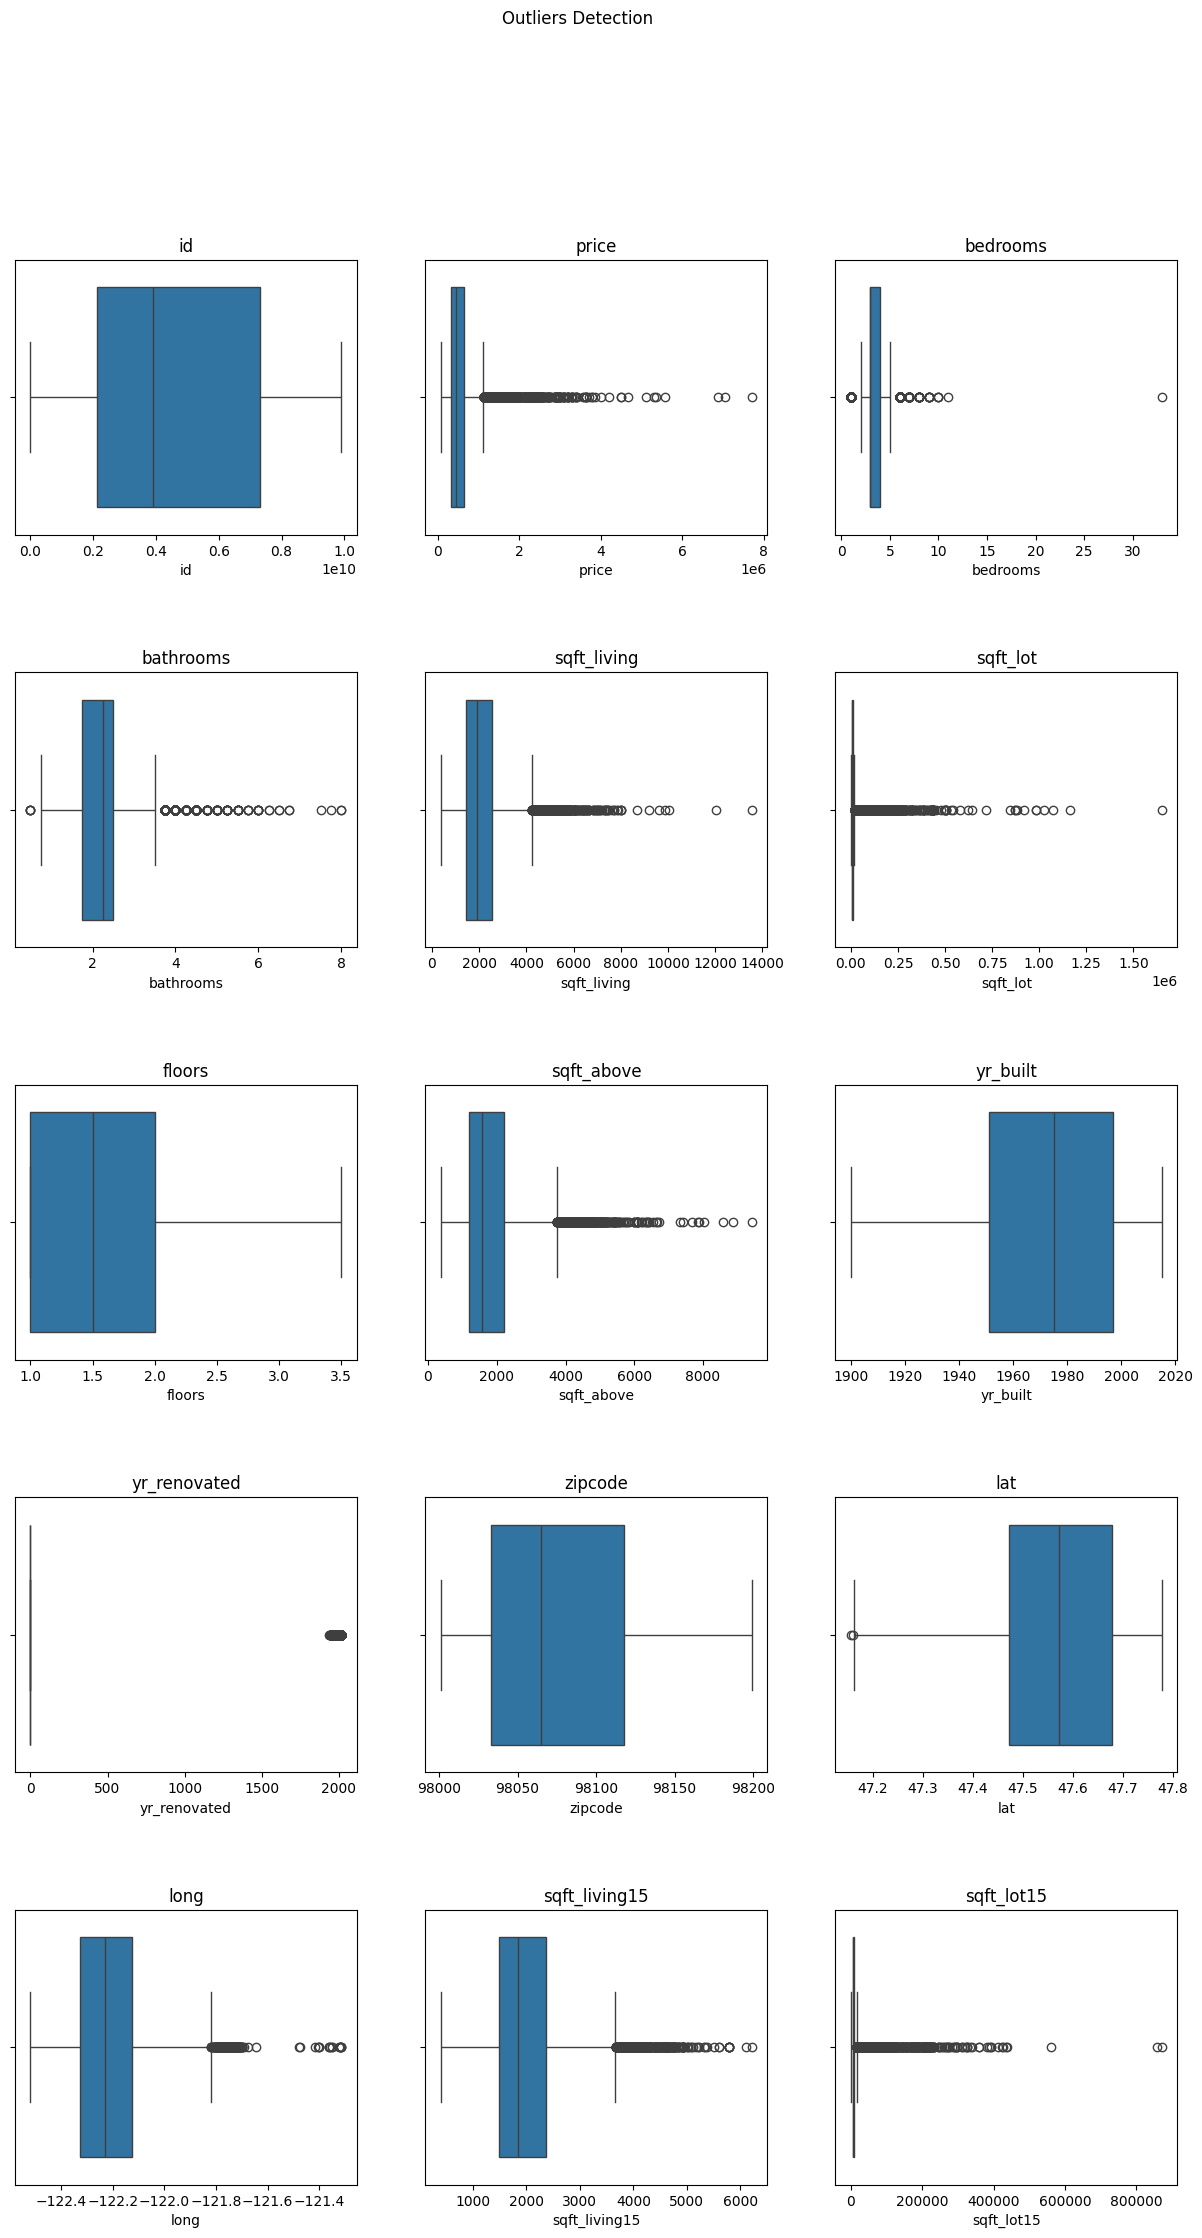

In [ ]:
df_1 = handling_outliers(df , display= True , drop=True , drop_order=2 , columns_to_drop =['price','bedrooms','bathrooms'])

In [ ]:
from uszipcode import SearchEngine
engine = SearchEngine()
import time
start = time.time()
def get_location(zipcode,df):

    location = engine.by_zipcode(zipcode)

    df["city"] = location.major_city
    df["state"] = location.state
    df["county"] = location.county
    df["population"] = location.population
    df["population_density"] = location.population_density

    return df

df=df.apply(lambda x: get_location(x['zipcode'], x), axis=1)
end = time.time()

print(f"The time of execution of above program is :{end-start}\n")
df

ModuleNotFoundError: No module named 'uszipcode'